In [1]:
import pandas as pd
import numpy as np
import contractions
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pip install contractions

In [3]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

In [4]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')

In [5]:
df=pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [6]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [7]:
df.shape

(23486, 11)

In [8]:
df.isna().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

####  Exploratory analysis

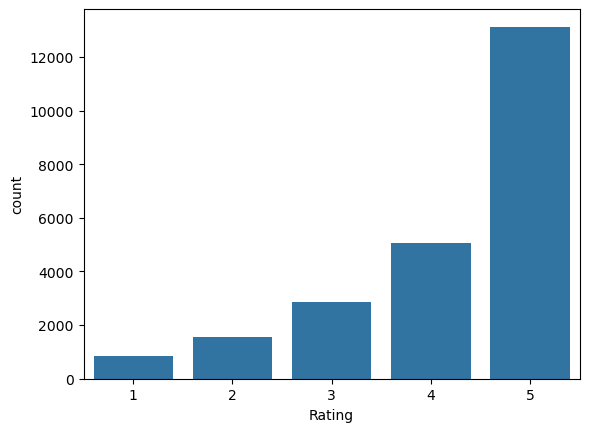

In [10]:
sns.countplot(x=df['Rating'])
plt.show()

<Axes: xlabel='Rating', ylabel='Count'>

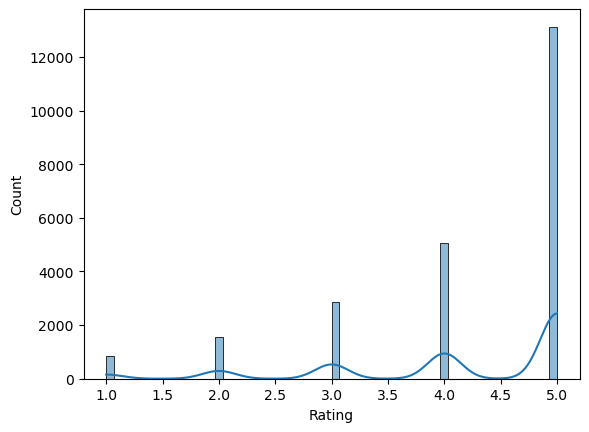

In [11]:
sns.histplot(df['Rating'], kde=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


<Axes: ylabel='Frequency'>

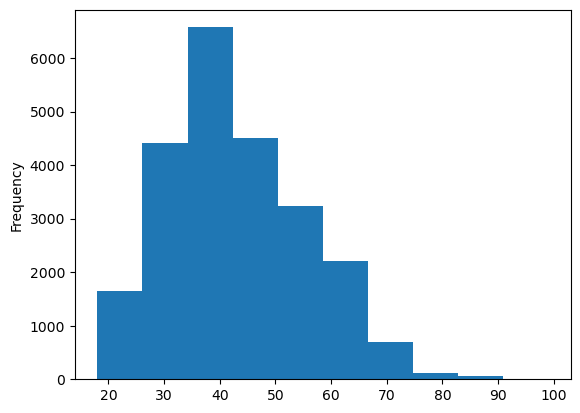

In [13]:
df["Customer Age"].plot(kind='hist')

<Axes: xlabel='Channel'>

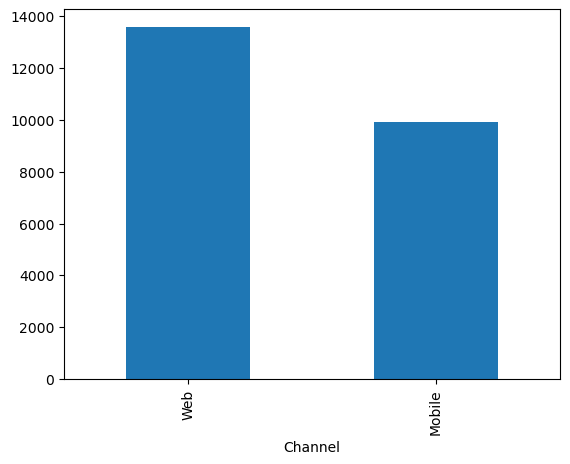

In [14]:
df.Channel.value_counts().plot(kind='bar')

<Axes: xlabel='SubCategory2'>

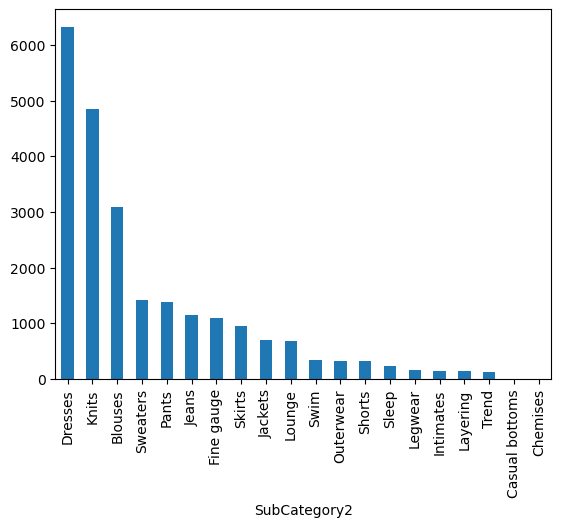

In [15]:
df.SubCategory2.value_counts().plot(kind='bar')

<Axes: xlabel='Location'>

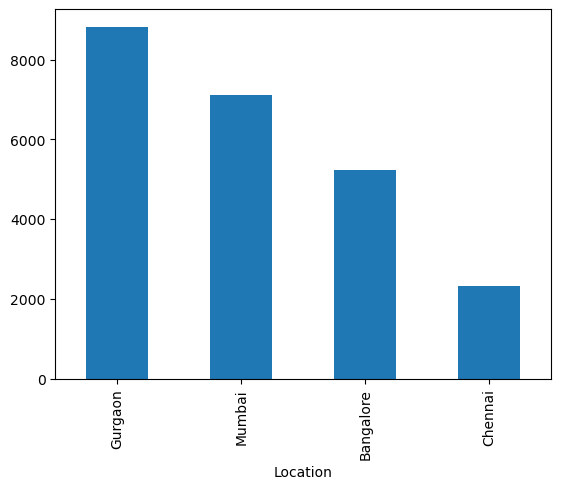

In [16]:
df.Location.value_counts().plot(kind='bar')

<Axes: xlabel='Subcategory1'>

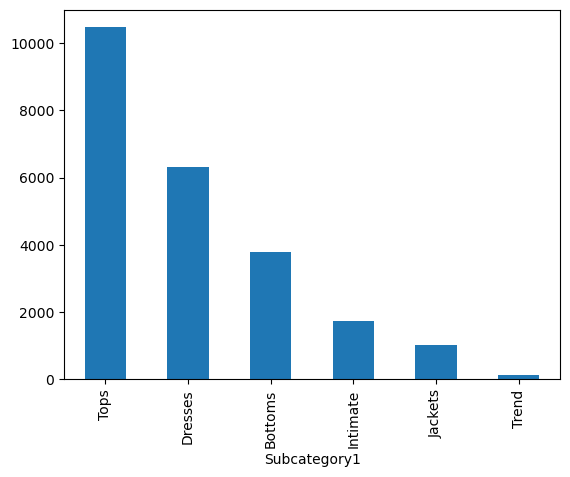

In [17]:
df.Subcategory1.value_counts().plot(kind='bar')

<Axes: xlabel='Category'>

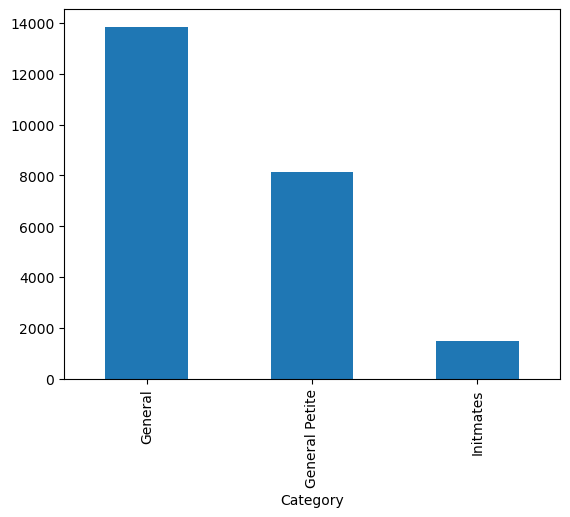

In [18]:
df.Category.value_counts().plot(kind='bar')

In [19]:
df=df[['Review Text','Rating']]

In [20]:
df=df.dropna()

In [21]:
df.isna().sum()

Review Text    0
Rating         0
dtype: int64

In [22]:
df.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [23]:
df['Rating'].value_counts()/df.shape[0]*100

Rating
5    55.386246
4    21.677488
3    12.468531
2     6.841571
1     3.626165
Name: count, dtype: float64

In [24]:
df.duplicated().sum()

7

In [25]:
df.drop_duplicates(keep='first')

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
...,...,...
23481,I was very happy to snag this dress at such a ...,5
23482,"It reminds me of maternity clothes. soft, stre...",3
23483,"This fit well, but the top was very see throug...",3
23484,I bought this dress for a wedding i have this ...,3


In [26]:
df.reset_index(drop=True,inplace=True)

In [27]:
# Covert to lower case 
def convert_lower(text):
    text = text.lower()
    return text

# Expanding contractions
def expand_contractions(text):
    text = contractions.fix(text)
    return text 

def remove_special_char_and_digits(text):
    text = text.replace('...',' ')
    text = re.sub('@\w+','',text)
    text = re.sub('www.\w+.com','',text)
    text = re.sub('[^a-z\s]','',text)
    text = re.sub('\s{2,}'," ",text)
    
    return text

def stemming(text):
    text = [ ps.stem(w) for w in text.split()]
    return (' '.join(text))

def lemmatization(text):
    text = [ lm.lemmatize(w,'v') for w in text.split()]
    return (' '.join(text))

def stopword_removal(text):
    text = [ word for word in text.split() if word not in stop_words]
    return (' '.join(text))

<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:14: SyntaxWarning: invalid escape sequence '\w'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:14: SyntaxWarning: invalid escape sequence '\w'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15304\3193523251.py:13: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('@\w+','',text)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15304\3193523251.py:14: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('www.\w+.com','',text)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15304\3193523251.py:15: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('[^a-z\s]','',text)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15304\3193523251.py:16: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s{2,}'," ",text

In [28]:
def clean_text(text,base_form):
    text = convert_lower(text)
    
    text = expand_contractions(text)
    
    text = remove_special_char_and_digits(text)
    
    if(base_form =='stem'):
        text = stemming(text)
    else:
        text = lemmatization(text)
        
    text = stopword_removal(text)
    
    return text

In [29]:
df['Review Text'].values

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

In [30]:
text='Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'
clean_text(text,'lemm')

'love dress sooo pretty happen find store glad never would order online petite buy petite love length hit little knee would definitely true midi someone truly petite'

In [31]:
df['clean_text'] = df['Review Text'].apply(lambda x : clean_text(x,'lemm'))

In [32]:
df.head()

,Review Text,Rating,clean_text
0,Absolutely wonderful - silky and sexy and comf...,4,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,5,love dress sooo pretty happen find store glad ...
2,I had such high hopes for this dress and reall...,3,high hop dress really want work initially orde...
3,"I love, love, love this jumpsuit. it's fun, fl...",5,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,5,shirt flatter due adjustable front tie perfect...


In [33]:
df.to_csv('Womens Clothing Reviews Clean_Data.csv',index=False)

In [34]:
df=pd.read_csv('Womens Clothing Reviews Clean_Data.csv')

In [35]:
df=df[['clean_text','Rating']]

In [36]:
df.head()

,clean_text,Rating
0,absolutely wonderful silky sexy comfortable,4
1,love dress sooo pretty happen find store glad ...,5
2,high hop dress really want work initially orde...,3
3,love love love jumpsuit fun flirty fabulous ev...,5
4,shirt flatter due adjustable front tie perfect...,5


In [37]:
#Categorize the ratings in only 3 sentiments.
def categorize_sentiment(score):
    if score < 3:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

In [38]:
df['Sentiment'] = df['Rating'].apply(categorize_sentiment)
df.head()

,clean_text,Rating,Sentiment
0,absolutely wonderful silky sexy comfortable,4,Positive
1,love dress sooo pretty happen find store glad ...,5,Positive
2,high hop dress really want work initially orde...,3,Neutral
3,love love love jumpsuit fun flirty fabulous ev...,5,Positive
4,shirt flatter due adjustable front tie perfect...,5,Positive


In [39]:
df=df[['clean_text','Sentiment']]

In [40]:
df.isna().sum()

clean_text    0
Sentiment     0
dtype: int64

In [41]:
corpus = list(df['clean_text'].values)
corpus[:4]

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happen find store glad never would order online petite buy petite love length hit little knee would definitely true midi someone truly petite',
 'high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer go major design flaw net layer sew directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment']

### TF IDF Vectorizer

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tfidf = TfidfVectorizer()
tf_emb = tfidf.fit_transform(corpus)

In [45]:
tfidf_data_df = pd.DataFrame(tf_emb.toarray(),columns=sorted(tfidf.vocabulary_.keys()))
tfidf_data_df.head(4)

,aa,aaaaaaamazing,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,aame,ab,abbey,...,zipepr,ziphoodie,ziploc,zipper,zippie,zombie,zone,zoolanders,zoom,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.132537,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
tfidf_1 = TfidfVectorizer(min_df=2)
tf_emb_1 = tfidf_1.fit_transform(corpus)

tfidf_data_df_1 = pd.DataFrame(tf_emb_1.toarray(),columns=sorted(tfidf_1.vocabulary_.keys()))
tfidf_data_df_1.head(4)

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abou,...,yup,zag,zero,zig,zigzag,zillion,zip,zipper,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.143519,0.132537,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [47]:
tfidf_data_df.shape, df.shape

((22641, 14998), (22641, 2))

In [48]:
tfidf_data_df1 = pd.concat([tfidf_data_df,df['Sentiment']],axis=1)

### Glove Embedding

In [50]:
'''import spacy
nlp = spacy.load('en_core_web_sm')'''

"import spacy\nnlp = spacy.load('en_core_web_sm')"

In [51]:
#pip install spacy

In [52]:
'''def average_word_embedding(doc, feature_size):
    vector = np.zeros((96),dtype='float64')
    
    total_words = len(doc)
    for word in doc:
        #print(nlp(word).vector)
        vector = np.add(vector,nlp(word).vector)
       # print(word)
    
    vector = np.divide(vector,total_words)
    return vector'''

"def average_word_embedding(doc, feature_size):\n    vector = np.zeros((96),dtype='float64')\n    \n    total_words = len(doc)\n    for word in doc:\n        #print(nlp(word).vector)\n        vector = np.add(vector,nlp(word).vector)\n       # print(word)\n    \n    vector = np.divide(vector,total_words)\n    return vector"

In [53]:
'''feature = []
for doc in corpus:
    emb = average_word_embedding(doc.split(), 300)
    feature.append(emb)'''

'feature = []\nfor doc in corpus:\n    emb = average_word_embedding(doc.split(), 300)\n    feature.append(emb)'

### Fasttext by Facebook 

In [55]:
import gensim
from gensim.models.fasttext import FastText

In [56]:
#pip install scipy==1.12

In [57]:
ft_model = FastText(corpus,vector_size=50)

In [58]:
def average_word_embedding_fasttext(doc, feature_size):
    vector = np.zeros((feature_size),dtype='float64')
    total_words = len(doc)
    for word in doc:
        vector = np.add(vector,ft_model.wv[word])
        #print(word)
    
    vector = np.divide(vector,total_words)
    return vector

In [59]:
feature_fastext = []
for doc in corpus:
    emb = average_word_embedding_fasttext(doc.split(), 50)
    feature_fastext.append(emb)

In [60]:
feature_fastext_df = pd.DataFrame(np.array(feature_fastext))

In [61]:
feature_fastext_df.to_csv('fasttext_embedding.csv',index=False)

In [62]:
feature_fastext_df1 = pd.concat([feature_fastext_df,df['Sentiment']],axis=1)

In [63]:
#pip install wordcloud

In [64]:
from wordcloud import WordCloud

In [65]:
df.head(30)

,clean_text,Sentiment
0,absolutely wonderful silky sexy comfortable,Positive
1,love dress sooo pretty happen find store glad ...,Positive
2,high hop dress really want work initially orde...,Neutral
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flatter due adjustable front tie perfect...,Positive
5,love tracy reese dress one petite feet tall us...,Negative
6,aded basket hte last mintue see would look lik...,Positive
7,order carbon store pick ton stuff always try u...,Positive
8,love dress usually get xs run little snug bust...,Positive
9,lbs order petite make sure length long typical...,Positive


In [66]:
df.shape

(22641, 2)

In [67]:
df_pstv=df[df['Sentiment']=='Positive']
df_neg=df[df['Sentiment']=='Negative']
df_neg

,clean_text,Sentiment
5,love tracy reese dress one petite feet tall us...,Negative
22,first pullover style side zipper would purchas...,Negative
26,wait sweater coat ship weeks excite arrive coa...,Negative
33,order months ago finally come back order huge ...,Negative
56,pregnant think would great sleep bra soft fit ...,Negative
...,...,...
22563,excite find fun lightweight white dress spring...,Negative
22581,order note review say sheer think would wear l...,Negative
22584,draw shirt beautiful silver gold embroidery fr...,Negative
22594,dress cute photo fit true size material slinky...,Negative


In [68]:
words_all = " ".join([word for word in df['clean_text']])

In [69]:
pstv_word=" ".join([word for word in df_pstv['clean_text']])
neg_word=" ".join([word for word in df_neg['clean_text']])
print(neg_word)

love tracy reese dress one petite feet tall usually wear p brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress first pullover style side zipper would purchase know side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like describe sadly return sure find something exchange wait sweater coat ship weeks excite arrive coat true size make look short squat sleeves wide although long light weight fall coat sleeves need wide would layerng much underneath button need move least three inch nicer fit think redo button sleeves look even proportion tigh order months ago finally come back order huge disappointment fit wasnt much issue quality wool subpar someone else mention quotfelted woolquot guess call literally feel like felt super thin itchy doesnt drape well feel cheap make china get sa

In [70]:
import matplotlib.pyplot as plt

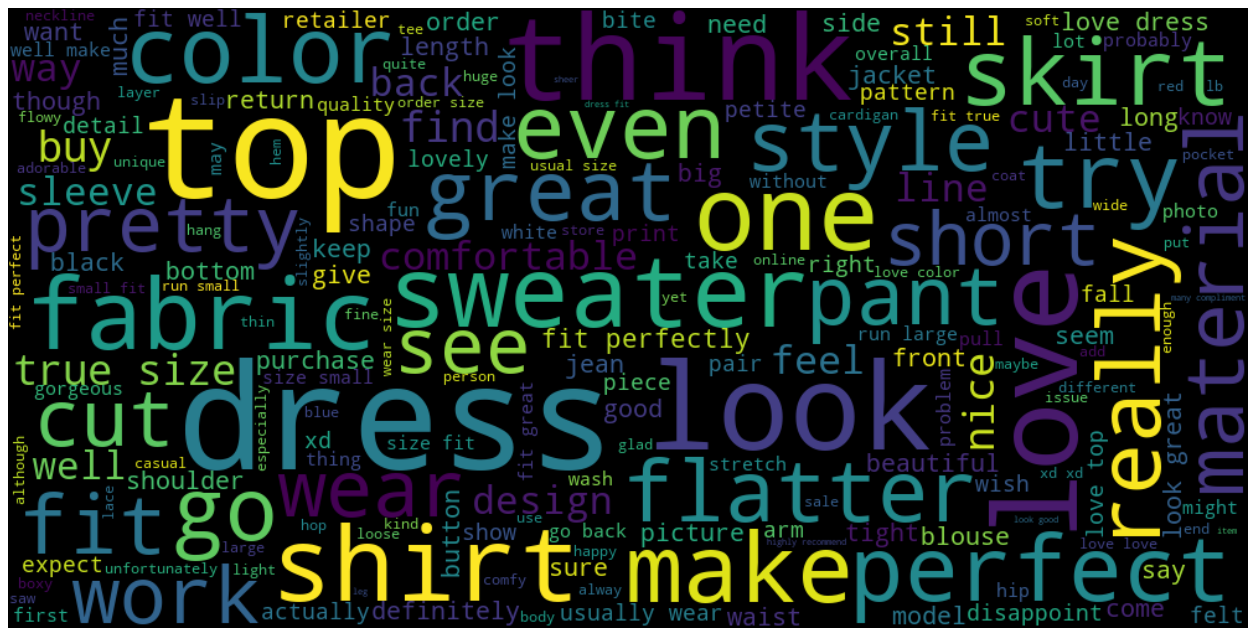

In [71]:
wordcloud = WordCloud(width = 1000,
                      height = 500,
                      random_state = 21,
                      max_font_size= 119).generate(words_all)
plt.figure(figsize = (20,20), dpi= 80)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

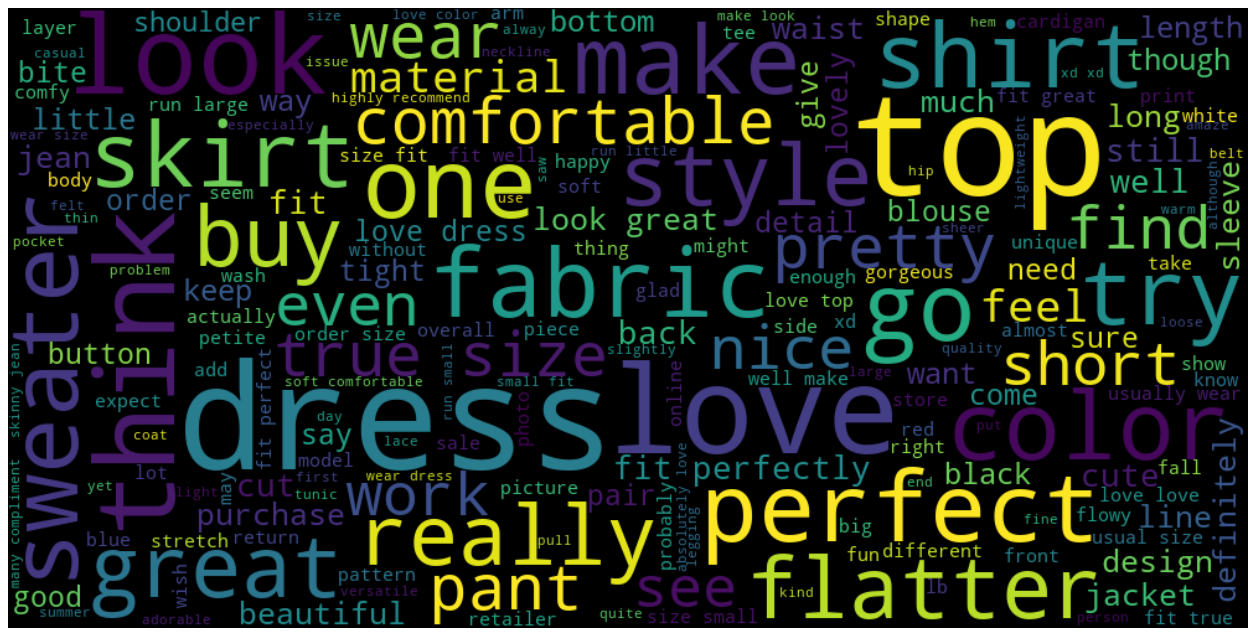

In [72]:
wordcloud2 = WordCloud(width = 1000,
                      height = 500,
                      random_state = 21,
                      max_font_size= 119).generate(pstv_word)
plt.figure(figsize = (20,20), dpi= 80)
plt.imshow(wordcloud2, interpolation= 'bilinear')
plt.axis('off')
plt.show()

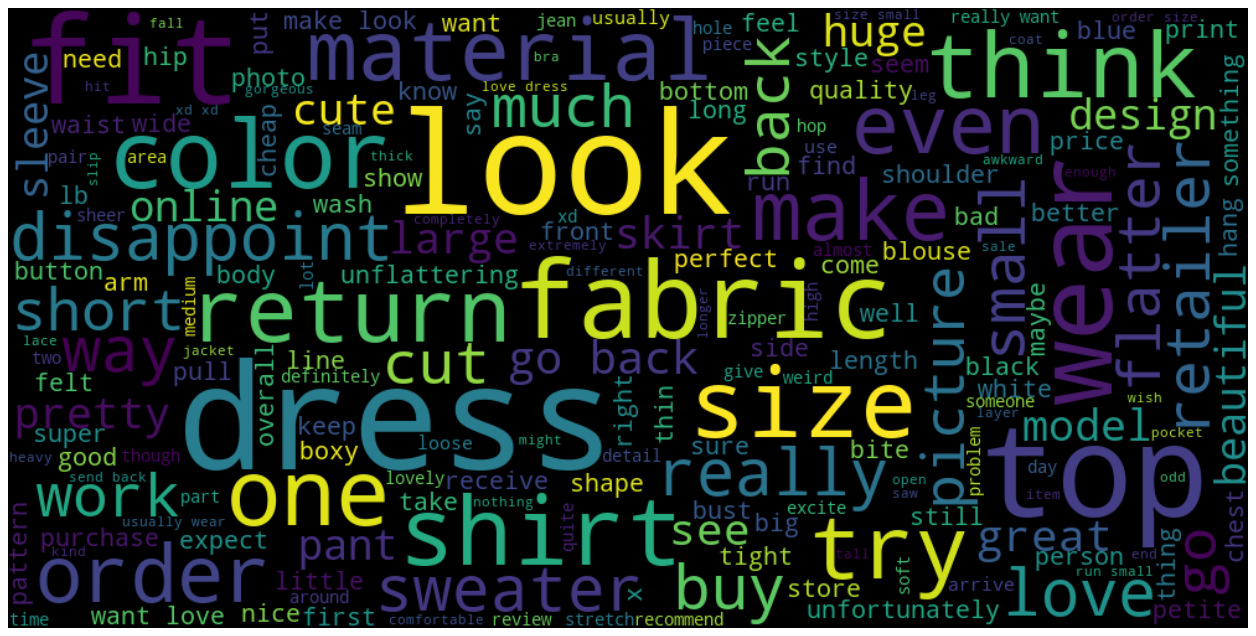

In [73]:
wordcloud3 = WordCloud(width = 1000,
                      height = 500,
                      random_state = 21,
                      max_font_size= 119).generate(neg_word)
plt.figure(figsize = (20,20), dpi= 80)
plt.imshow(wordcloud3, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

In [76]:
df.head()

,clean_text,Sentiment
0,absolutely wonderful silky sexy comfortable,2
1,love dress sooo pretty happen find store glad ...,2
2,high hop dress really want work initially orde...,1
3,love love love jumpsuit fun flirty fabulous ev...,2
4,shirt flatter due adjustable front tie perfect...,2


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
xtrain1,xtest1, ytrain1, ytest1 = train_test_split(tfidf_data_df,df['Sentiment'],test_size=0.20,random_state=45)
#xtrain2,xtest2, ytrain2, ytest2 = train_test_split(feature_glove_df,df['sentiment'],test_size=0.20,random_state=45)
xtrain3,xtest3, ytrain3, ytest3 = train_test_split(feature_fastext_df,df['Sentiment'],test_size=0.20,random_state=45)
xtrain4,xtest4, ytrain4, ytest4 = train_test_split(tfidf_data_df_1,df['Sentiment'],test_size=0.20,random_state=45)

### Model Building

#### LogisticRegression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [82]:
lr_tf = LogisticRegression()
#lr_glove = LogisticRegression()
lr_fasttext = LogisticRegression()
lr_tf_min_df = LogisticRegression()

In [83]:
lr_tf.fit(xtrain1,ytrain1)
#lr_glove.fit(xtrain2,ytrain2)
lr_fasttext.fit(xtrain3,ytrain3)
lr_tf_min_df.fit(xtrain4,ytrain4)

LogisticRegression()

In [84]:
pred_tf = lr_tf.predict(xtest1)
#pred_glove = lr_glove.predict(xtest2)
pred_fasttext = lr_fasttext.predict(xtest3)
pred_tf_min_df = lr_tf_min_df.predict(xtest4)

In [85]:
accuracy_score(ytest1,pred_tf),accuracy_score(ytest3,pred_fasttext),accuracy_score(ytest4,pred_tf_min_df)

(0.8196069772576727, 0.7743431221020093, 0.8215941708986532)

#### DecisionTreeClassifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt_tf = DecisionTreeClassifier()

In [89]:
dt_tf.fit(xtrain1,ytrain1)

DecisionTreeClassifier()

In [90]:
pred_dt_tf = dt_tf.predict(xtest1)

In [91]:
accuracy_score(ytest1,pred_dt_tf)

0.7281960697725768

#### RandomForestClassifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf_tf = RandomForestClassifier()

In [ ]:
rf_tf.fit(xtrain1,ytrain1)

In [ ]:
pred_rf_tf = rf_tf.predict(xtest1)

In [ ]:
accuracy_score(ytest1,pred_rf_tf)

### Here LogisticRegression with TF IDF Vectorizer is the best model

In [ ]:
print(classification_report(ytest1, pred_tf))